In [19]:
# Importing all the necessary files/libraries
import cv2
import matplotlib.pyplot as plt

In [38]:
# uploading the image
file = 'D:/Z/Downloads/Lenna_(test_image).png'
image = cv2.imread(file)

# RGB Image
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# GrayScale Image
image_GRAY = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2GRAY)

# HSV Image
image_HSV = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2HSV)

# LMV Image
image_LUV = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2LUV)

[]

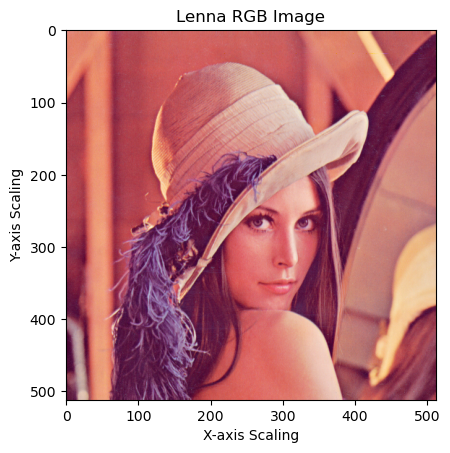

In [39]:
plt.title("Lenna RGB Image")
plt.xlabel("X-axis Scaling")
plt.ylabel("Y-axis Scaling")
plt.imshow(image_RGB)
plt.plot()

## `User-Defined Function to convert RGB2GRAY`

**Method 1: No in-built functions**

In [40]:
def RGB2GRAY(image):
    pixel_values = []
    new_image = []
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pxl_val = round((0.2989*image[i][j][0]) + (0.5870*image[i][j][1]) + (0.1140*image[i][j][2]))
            pixel_values.append(pxl_val)
            
    start = 0
    end = image.shape[1]
    
    for i in range(0, (image.shape[0]*image.shape[1])):
        if start==len(pixel_values):
            break
            
        new_image.append(pixel_values[start:end])
        
        start += image.shape[0]
        end += image.shape[0]   
        
    return new_image

[]

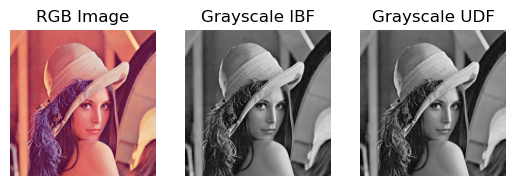

In [41]:
plt.subplot(131),plt.imshow(image_RGB, cmap = 'gray'),plt.title('RGB Image'), plt.axis('off')
plt.subplot(132),plt.imshow(image_GRAY, cmap = 'gray'),plt.title('Grayscale IBF'), plt.axis('off')
plt.subplot(133),plt.imshow(RGB2GRAY(image), cmap = 'gray'),plt.title('Grayscale UDF'), plt.axis('off')
plt.plot()

**Method 2: Using NumPy**

In [42]:
def RGB2GRAY_(image):
    import numpy as np
    
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    gray_image = np.round(0.2989 * r + 0.5870 * g + 0.1140 * b).astype(np.uint8)
    
    return gray_image.tolist()

[]

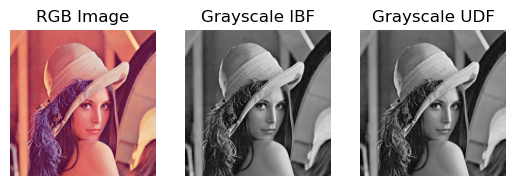

In [43]:
plt.subplot(131),plt.imshow(image_RGB, cmap = 'gray'),plt.title('RGB Image'), plt.axis('off')
plt.subplot(132),plt.imshow(image_GRAY, cmap = 'gray'),plt.title('Grayscale IBF'), plt.axis('off')
plt.subplot(133),plt.imshow(RGB2GRAY_(image), cmap = 'gray'),plt.title('Grayscale UDF'), plt.axis('off')
plt.plot()

## `User-Defined Function to convert RGB2HSV`

**Method 1: No in-built functions**

In [44]:
def RGB2HSV(image):
    
    width, height, _ = image.shape
    hsv_image = []
    pixel_values = []
    
    for i in range(width):
        for j in range(height):
            r, g, b = image[i, j] / 255.0  # Normalize RGB values to the range [0, 1]
            
            c_max = max(r, g, b)
            c_min = min(r, g, b)
            delta = c_max - c_min
            
            # Calculate the hue
            if delta == 0:
                h = 0
            elif c_max == r:
                h = 60 * (((g - b) / delta) % 6)
            elif c_max == g:
                h = 60 * (((b - r) / delta) + 2)
            else:
                h = 60 * (((r - g) / delta) + 4)
            
            # Calculate the saturation
            if c_max == 0:
                s = 0
            else:
                s = delta / c_max
            
            # Calculate the value
            v = c_max
            
            pixel_values.append([h, s, v])
            
    start = 0
    end = image.shape[1]
    
    for i in range(0, (image.shape[0]*image.shape[1])):
        if start==len(pixel_values):
            break
            
        hsv_image.append(pixel_values[start:end])
        
        start += image.shape[0]
        end += image.shape[0] 
    
    return hsv_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

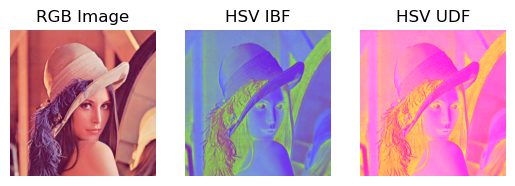

In [45]:
plt.subplot(131),plt.imshow(image_RGB, cmap = 'gray'),plt.title('RGB Image'), plt.axis('off')
plt.subplot(132),plt.imshow(image_HSV, cmap = 'gray'),plt.title('HSV IBF'), plt.axis('off')
plt.subplot(133),plt.imshow(RGB2HSV(image), cmap = 'gray'),plt.title('HSV UDF'), plt.axis('off')
plt.plot()

**Method 2: Using NumPy**

In [46]:
def RGB2HSV_(image):
    import numpy as np
    
    width, height, _ = image.shape
    hsv_image = np.zeros_like(image, dtype=np.float32)
    
    for i in range(width):
        for j in range(height):
            r, g, b = image[i, j] / 255.0  # Normalize RGB values to the range [0, 1]
            
            c_max = max(r, g, b)
            c_min = min(r, g, b)
            delta = c_max - c_min
            
            # Calculate the hue
            if delta == 0:
                h = 0
            elif c_max == r:
                h = 60 * (((g - b) / delta) % 6)
            elif c_max == g:
                h = 60 * (((b - r) / delta) + 2)
            else:
                h = 60 * (((r - g) / delta) + 4)
            
            # Calculate the saturation
            if c_max == 0:
                s = 0
            else:
                s = delta / c_max
            
            # Calculate the value
            v = c_max
            
            hsv_image[i, j] = [h, s, v]
    
    return hsv_image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

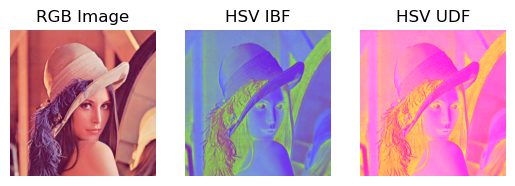

In [47]:
plt.subplot(131),plt.imshow(image_RGB, cmap = 'gray'),plt.title('RGB Image'), plt.axis('off')
plt.subplot(132),plt.imshow(image_HSV, cmap = 'gray'),plt.title('HSV IBF'), plt.axis('off')
plt.subplot(133),plt.imshow(RGB2HSV_(image), cmap = 'gray'),plt.title('HSV UDF'), plt.axis('off')
plt.plot()

## `User-Defined Function to convert RGB2LMV`

**Method 1: No in-built functions**

In [48]:
def RGB2LUV(image):
    new_image = []
    
    for i in range(image.shape[0]):
        row = []
        for j in range(image.shape[1]):
            R = image[i][j][0]
            G = image[i][j][1]
            B = image[i][j][2]
            
            max_val = max(R, G, B)
            min_val = min(R, G, B)
            
            # Luminance (L)
            L = (max_val + min_val) // 2
            
            # Mids (M)
            U = (max_val - min_val) // 2
            
            # Value (V)
            V = max_val
            
            row.append([L, U, V])
        
        new_image.append(row)
    
    return new_image

C:\Users\KRISH\AppData\Local\Temp\ipykernel_5480\2912498311.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  L = (max_val + min_val) // 2


[]

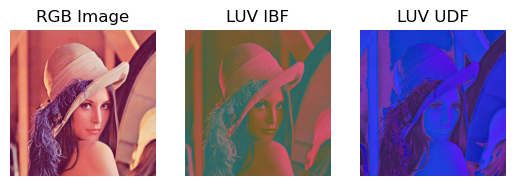

In [49]:
plt.subplot(131),plt.imshow(image_RGB, cmap = 'gray'),plt.title('RGB Image'), plt.axis('off')
plt.subplot(132),plt.imshow(image_LUV, cmap = 'gray'),plt.title('LUV IBF'), plt.axis('off')
plt.subplot(133),plt.imshow(RGB2LUV(image), cmap = 'gray'),plt.title('LUV UDF'), plt.axis('off')
plt.plot()

**Method 2: Using NumPy**

In [50]:
def RGB2LUV_(image):
    import numpy as np

    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    
    max_val = np.max(image, axis=2)
    min_val = np.min(image, axis=2)
    
    # Luminance (L)
    L = (max_val + min_val) // 2
    
    # Mids (M)
    U = (max_val - min_val) // 2
    
    # Value (V)
    V = max_val
    
    new_image = np.dstack((L, U, V))
    
    return new_image

[]

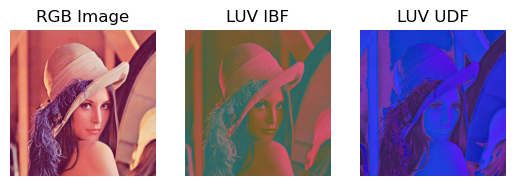

In [53]:
plt.subplot(131),plt.imshow(image_RGB, cmap = 'gray'),plt.title('RGB Image'), plt.axis('off')
plt.subplot(132),plt.imshow(image_LUV, cmap = 'gray'),plt.title('LUV IBF'), plt.axis('off')
plt.subplot(133),plt.imshow(RGB2LUV_(image), cmap = 'gray'),plt.title('LUV UDF'), plt.axis('off')
plt.plot()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\KRISH\AppData\Local\Temp\ipykernel_5480\3261665964.py:15: RuntimeWarning: overflow encountered in ubyte_scalars
  L = (max_val + min_val) // 2


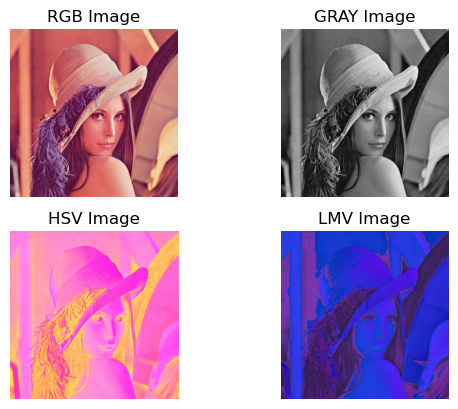

In [54]:
plt.subplot(221),plt.imshow(image_RGB, cmap = 'gray'),plt.title('RGB Image'), plt.axis('off')
plt.subplot(222),plt.imshow(RGB2GRAY(image), cmap = 'gray'),plt.title('GRAY Image'),plt.axis('off')
plt.subplot(223),plt.imshow(RGB2HSV(image), cmap = 'gray'),plt.title('HSV Image'),plt.axis('off')
plt.subplot(224),plt.imshow(RGB2LMV(image), cmap = 'gray'),plt.title('LMV Image'),plt.axis('off')
plt.show()

<hr>